In [33]:
import pandas as pd
import matplotlib.pyplot as plt


TRADER_NAMES = ['Vinnie', 'Vladimir', 'Rhianna', 'Ruby']

TRADER = 'Ruby' #Set to one of the names above
PRODUCT = 'GIFT_BASKET' 

# Read in trade data with names and create one big df
df1 = pd.read_csv('../../../data/round-5-island-data-bottle/trades_round_3_day_0_wn.csv', sep=';')
df2 = pd.read_csv('../../../data/round-5-island-data-bottle/trades_round_3_day_1_wn.csv', sep=';')
df2['timestamp'] = df2['timestamp'] + 1000000
df3 = pd.read_csv('../../../data/round-5-island-data-bottle/trades_round_3_day_2_wn.csv', sep=';')
df3['timestamp'] = df3['timestamp'] + 2000000
df = pd.concat([df1, df2, df3])
df = df.query('symbol==@PRODUCT')
# Read in prices data and create one big df
df1 = pd.read_csv('../../../data/round-3-island-data-bottle/prices_round_3_day_0.csv', sep=';')
df2 = pd.read_csv('../../../data/round-3-island-data-bottle/prices_round_3_day_1.csv', sep=';')
df2['timestamp'] = df2['timestamp'] + 1000000
df3 = pd.read_csv('../../../data/round-3-island-data-bottle/prices_round_3_day_2.csv', sep=';')
df3['timestamp'] = df3['timestamp'] + 2000000
prices = pd.concat([df1, df2, df3])
prices = prices.query('product==@PRODUCT')
print(f'Buyers of {PRODUCT} and number of trades: {df.buyer.value_counts()}')
print(f'Sellers of {PRODUCT} and number of trades: {df.seller.value_counts()}')

Buyers of GIFT_BASKET and number of trades: buyer
Vinnie      558
Vladimir    464
Ruby        385
Rhianna     358
Name: count, dtype: int64
Sellers of GIFT_BASKET and number of trades: seller
Rhianna     592
Vinnie      486
Ruby        403
Vladimir    284
Name: count, dtype: int64


For each trader we want to show:

1.) position over time, assuming they start at position 0 and have to cloas at mid price at EOD
2.) plot of when they trade and how much they trade over time plotted against mid price

In [34]:
df_trader = df.query('buyer==@TRADER or seller==@TRADER').copy()
df_trader['quantity'] = df_trader.apply(lambda x: x['quantity'] if x['buyer'] == TRADER else -x['quantity'], axis=1)
df_trader_1 = df_trader.query('timestamp < 1000000').copy()
df_trader_1['position'] = df_trader_1['quantity'].cumsum()
df_trader_2 = df_trader.query('timestamp < 2000000 and timestamp >= 1000000').copy()
df_trader_2['position'] = df_trader_2['quantity'].cumsum()
df_trader_3 = df_trader.query('timestamp < 3000000 and timestamp >= 2000000').copy()
df_trader_3['position'] = df_trader_3['quantity'].cumsum()
df_trader = pd.concat([df_trader_1, df_trader_2, df_trader_3])
df_trader = df_trader.merge(prices[['timestamp', 'mid_price']], on='timestamp', how='right')
#fill na values of position with most recent value
df_trader['position'] = df_trader['position'].fillna(method='ffill')
df_trader['position'] = df_trader['position'].fillna(0)

/var/folders/qz/2xz7hqzj4mv4_58tqxfy0z640000gn/T/ipykernel_89533/778710723.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_trader['position'] = df_trader['position'].fillna(method='ffill')


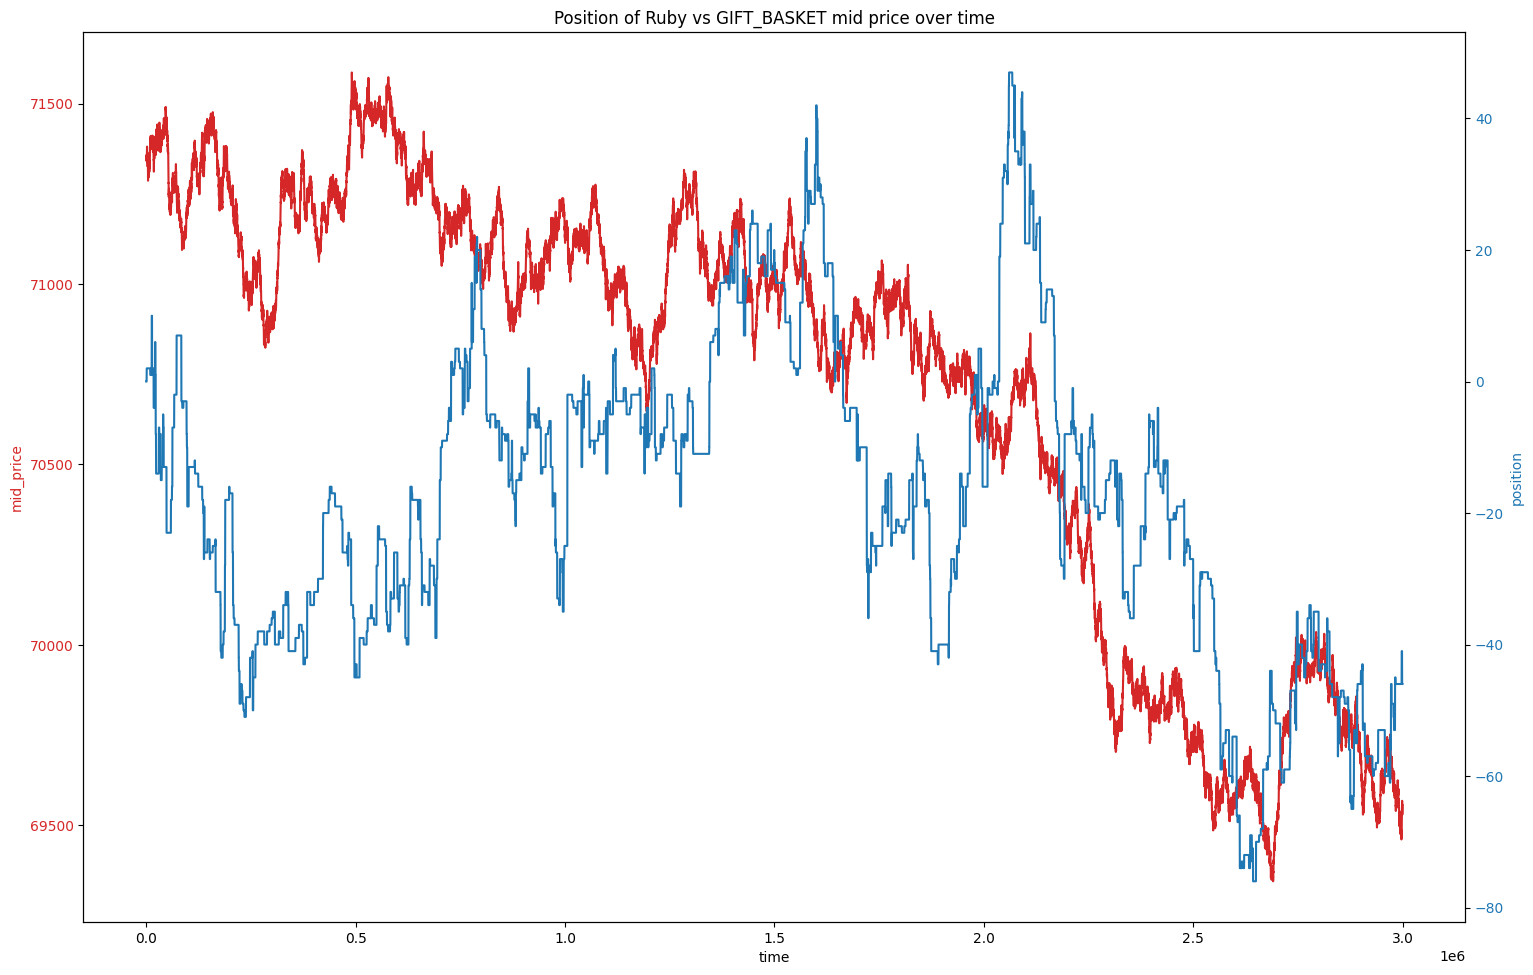

In [35]:
#plot position and price over time wtih right y axis for position
#make figure very wide to see the data better
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price', color=color)
ax1.plot(df_trader['timestamp'], df_trader['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('position', color=color)
ax2.plot(df_trader['timestamp'], df_trader['position'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
#set title
plt.title(f'Position of {TRADER} vs {PRODUCT} mid price over time')
plt.show()

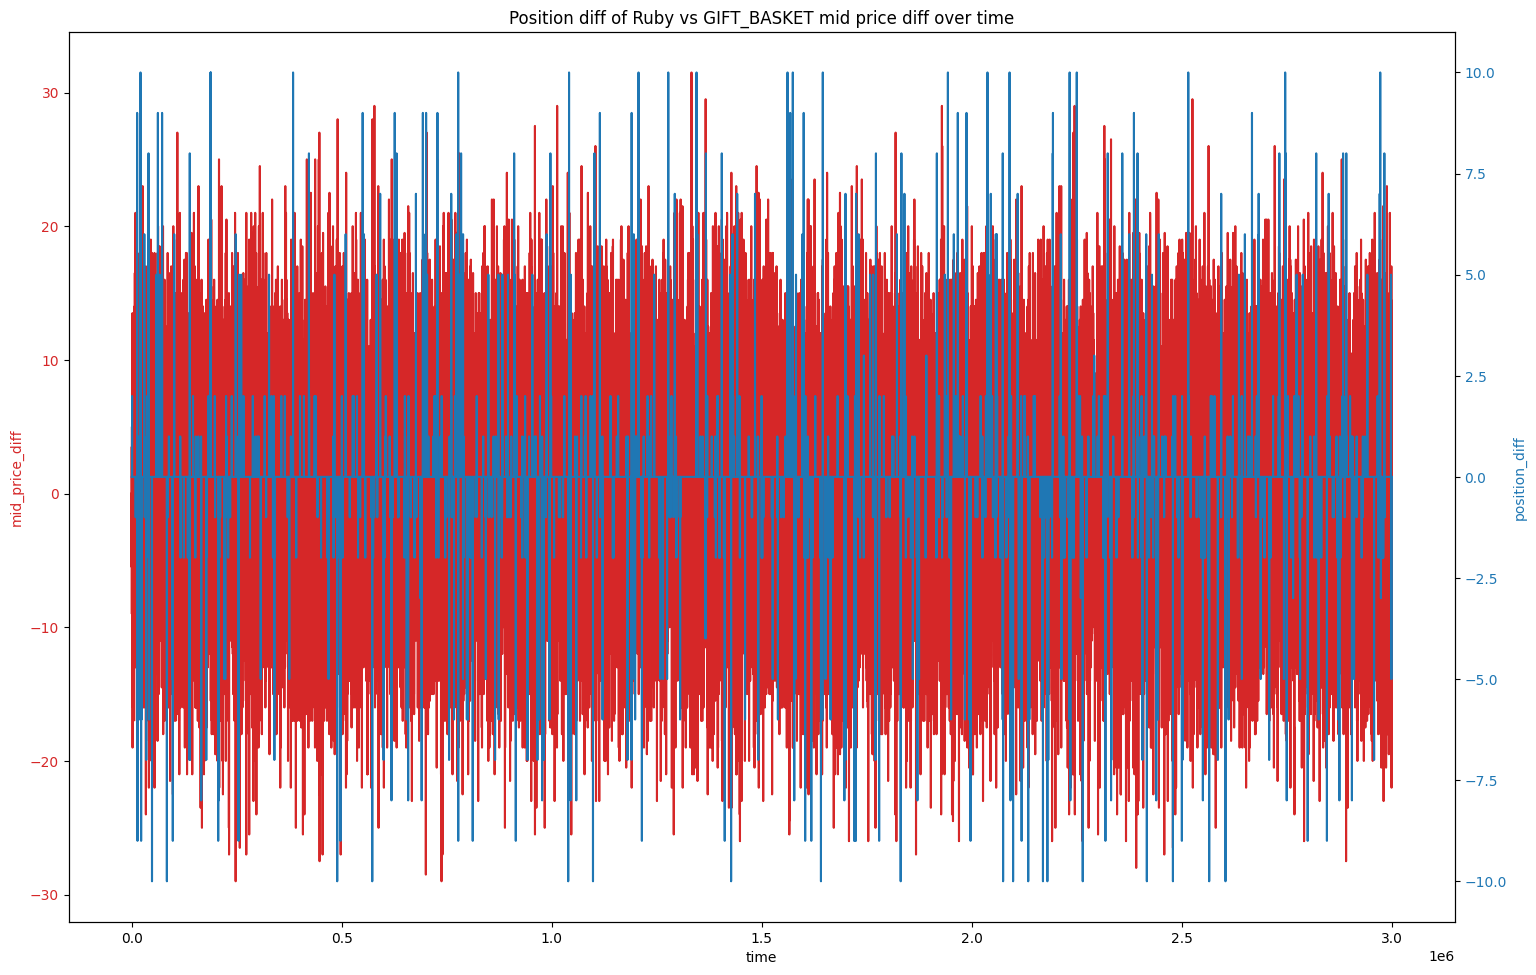

Correlation between mid price diff and position diff: -0.0001711653712685187


In [36]:
df_trader['mid_price_diff'] = df_trader['mid_price'].diff()
df_trader['position_diff'] = df_trader['position'].diff()
df_trader['mid_price_diff'] = df_trader['mid_price_diff'].fillna(0)
df_trader['position_diff'] = df_trader['position_diff'].fillna(0)
df_trader['position_diff'] = df_trader['position_diff'].clip(min(df_trader['quantity']), df_trader['quantity'])

#plot position and price over time wtih right y axis for position
#make figure very wide to see the data better
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price_diff', color=color)
ax1.plot(df_trader['timestamp'], df_trader['mid_price_diff'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('position_diff', color=color)
ax2.plot(df_trader['timestamp'], df_trader['position_diff'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
#set title
plt.title(f'Position diff of {TRADER} vs {PRODUCT} mid price diff over time')
plt.show()
print(f'Correlation between mid price diff and position diff: {df_trader["mid_price_diff"].corr(df_trader["position_diff"])}')


Check for signals grouped by snake type and see if they are profitable.

/var/folders/qz/2xz7hqzj4mv4_58tqxfy0z640000gn/T/ipykernel_89533/1188759910.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_vipers['position'] = df_vipers['position'].fillna(method='ffill')


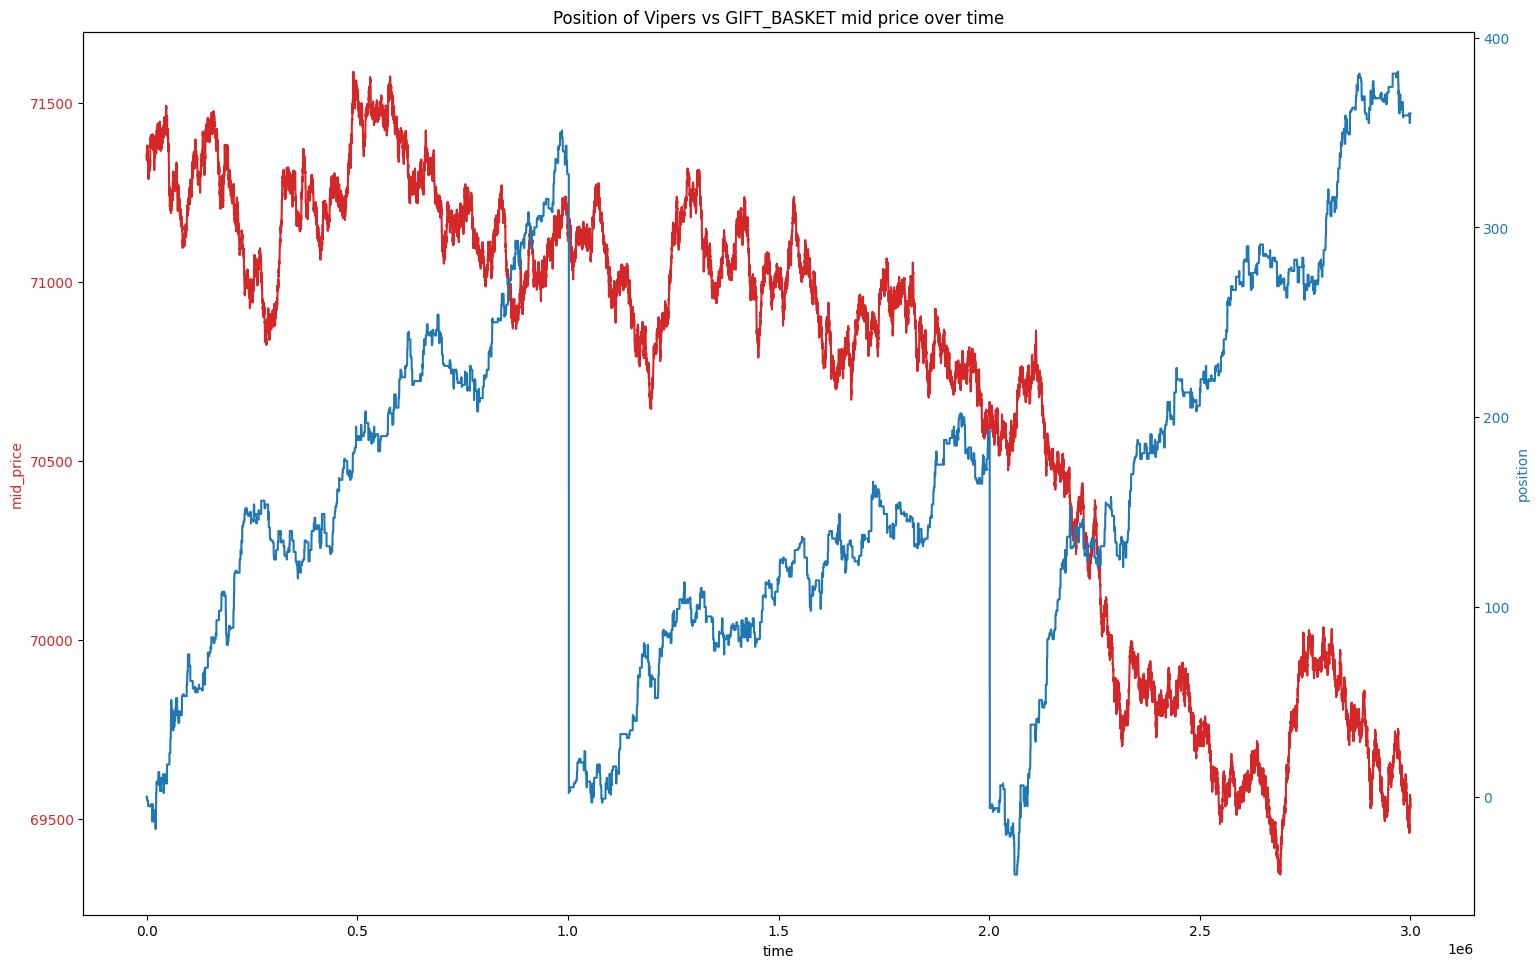

/var/folders/qz/2xz7hqzj4mv4_58tqxfy0z640000gn/T/ipykernel_89533/1188759910.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_rattlesnakes['position'] = df_rattlesnakes['position'].fillna(method='ffill')


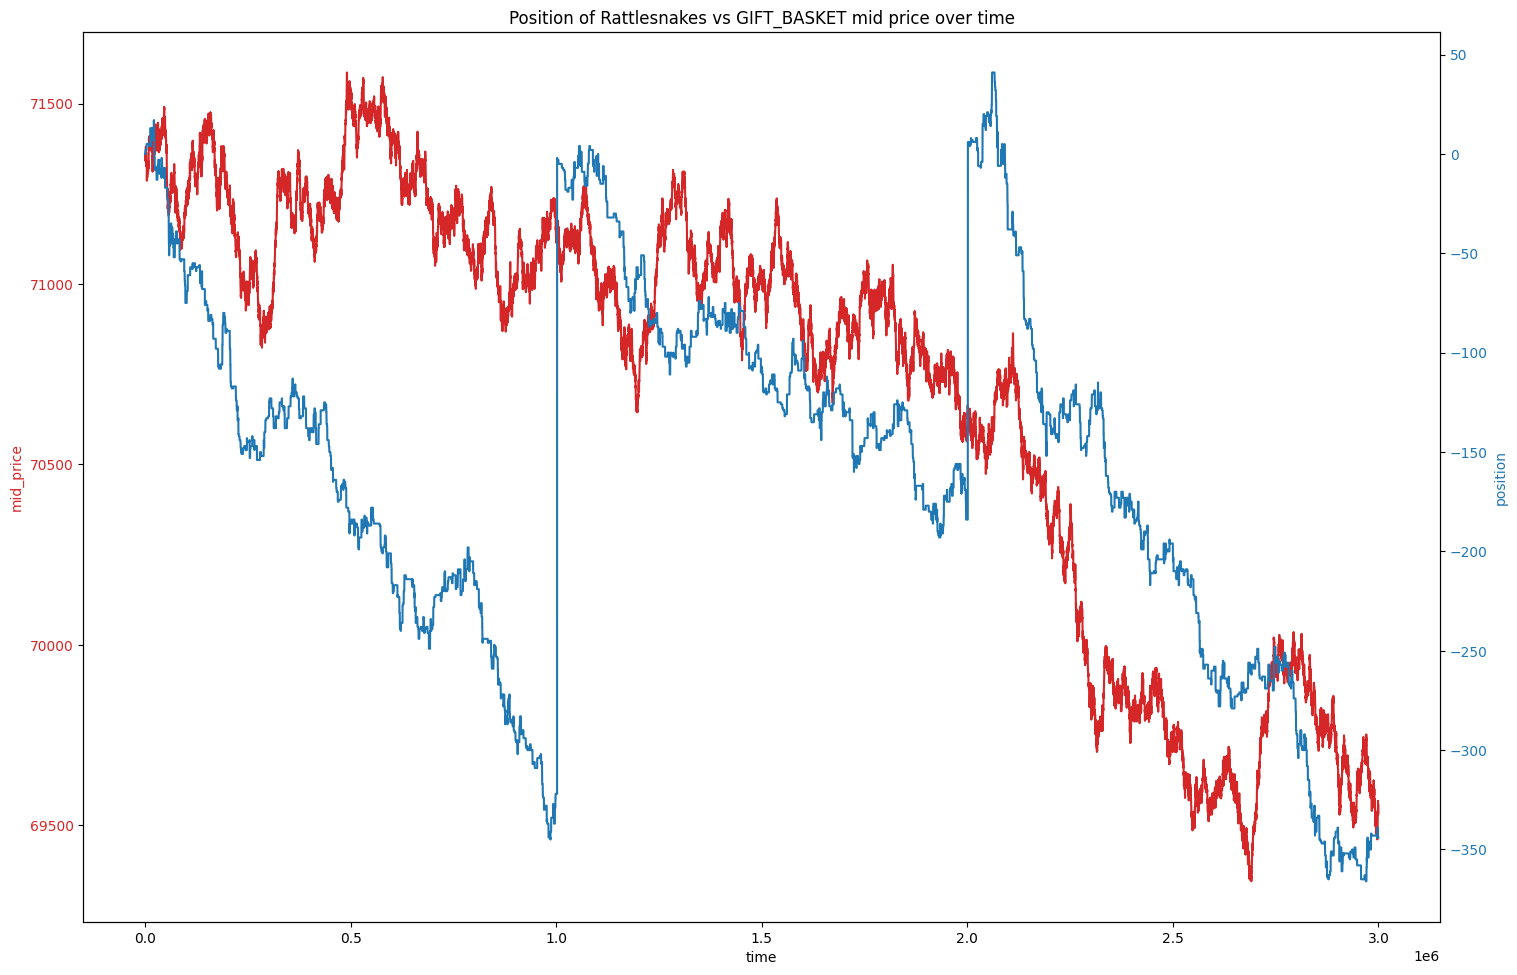

In [37]:
vipers = ['Vinnie', 'Vladimir']

df_vipers = df.query('buyer in @vipers or seller in @vipers').copy()
df_vipers['quantity'] = df_vipers.apply(lambda x: x['quantity'] if x['buyer'] in vipers else -x['quantity'], axis=1)
df_vipers_1 = df_vipers.query('timestamp < 1000000').copy()
df_vipers_1['position'] = df_vipers_1['quantity'].cumsum()
df_vipers_2 = df_vipers.query('timestamp < 2000000 and timestamp >= 1000000').copy()
df_vipers_2['position'] = df_vipers_2['quantity'].cumsum()
df_vipers_3 = df_vipers.query('timestamp < 3000000 and timestamp >= 2000000').copy()
df_vipers_3['position'] = df_vipers_3['quantity'].cumsum()
df_vipers = pd.concat([df_vipers_1, df_vipers_2, df_vipers_3])
df_vipers = df_vipers.merge(prices[['timestamp', 'mid_price']], on='timestamp', how='right')
#fill na values of position with most recent value
df_vipers['position'] = df_vipers['position'].fillna(method='ffill')
df_vipers['position'] = df_vipers['position'].fillna(0)

#plot position and price over time wtih right y axis for position
#make figure very wide to see the data better
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price', color=color)
ax1.plot(df_vipers['timestamp'], df_vipers['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('position', color=color)
ax2.plot(df_vipers['timestamp'], df_vipers['position'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
#set title
plt.title(f'Position of Vipers vs {PRODUCT} mid price over time')
plt.show()

rattlesnakes = ['Remy', 'Rhianna', 'Ruby']

df_rattlesnakes = df.query('buyer in @rattlesnakes or seller in @rattlesnakes').copy()
df_rattlesnakes['quantity'] = df_rattlesnakes.apply(lambda x: x['quantity'] if x['buyer'] in rattlesnakes else -x['quantity'], axis=1)
df_rattlesnakes_1 = df_rattlesnakes.query('timestamp < 1000000').copy()
df_rattlesnakes_1['position'] = df_rattlesnakes_1['quantity'].cumsum()
df_rattlesnakes_2 = df_rattlesnakes.query('timestamp < 2000000 and timestamp >= 1000000').copy()
df_rattlesnakes_2['position'] = df_rattlesnakes_2['quantity'].cumsum()
df_rattlesnakes_3 = df_rattlesnakes.query('timestamp < 3000000 and timestamp >= 2000000').copy()
df_rattlesnakes_3['position'] = df_rattlesnakes_3['quantity'].cumsum()
df_rattlesnakes = pd.concat([df_rattlesnakes_1, df_rattlesnakes_2, df_rattlesnakes_3])
df_rattlesnakes = df_rattlesnakes.merge(prices[['timestamp', 'mid_price']], on='timestamp', how='right')
#fill na values of position with most recent value
df_rattlesnakes['position'] = df_rattlesnakes['position'].fillna(method='ffill')
df_rattlesnakes['position'] = df_rattlesnakes['position'].fillna(0)

#plot position and price over time wtih right y axis for position
#make figure very wide to see the data better
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price', color=color)
ax1.plot(df_rattlesnakes['timestamp'], df_rattlesnakes['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('position', color=color)
ax2.plot(df_rattlesnakes['timestamp'], df_rattlesnakes['position'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
#set title
plt.title(f'Position of Rattlesnakes vs {PRODUCT} mid price over time')
plt.show()

Check if trader's largest or smallest quantity traded is a signal

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Largest trade of GIFT_BASKET by Ruby: 10.0
Smallest trade of GIFT_BASKET by Ruby: -10.0
Value counts of trades of GIFT_BASKET by Ruby: quantity
-2.0     132
 1.0     127
-1.0     124
 2.0     122
 5.0      31
-6.0      29
-5.0      28
 6.0      25
 8.0      24
-7.0      23
-9.0      23
 10.0     20
-10.0     19
-8.0      19
 9.0      18
 7.0      15
-3.0       5
 3.0       3
-4.0       1
Name: count, dtype: int64


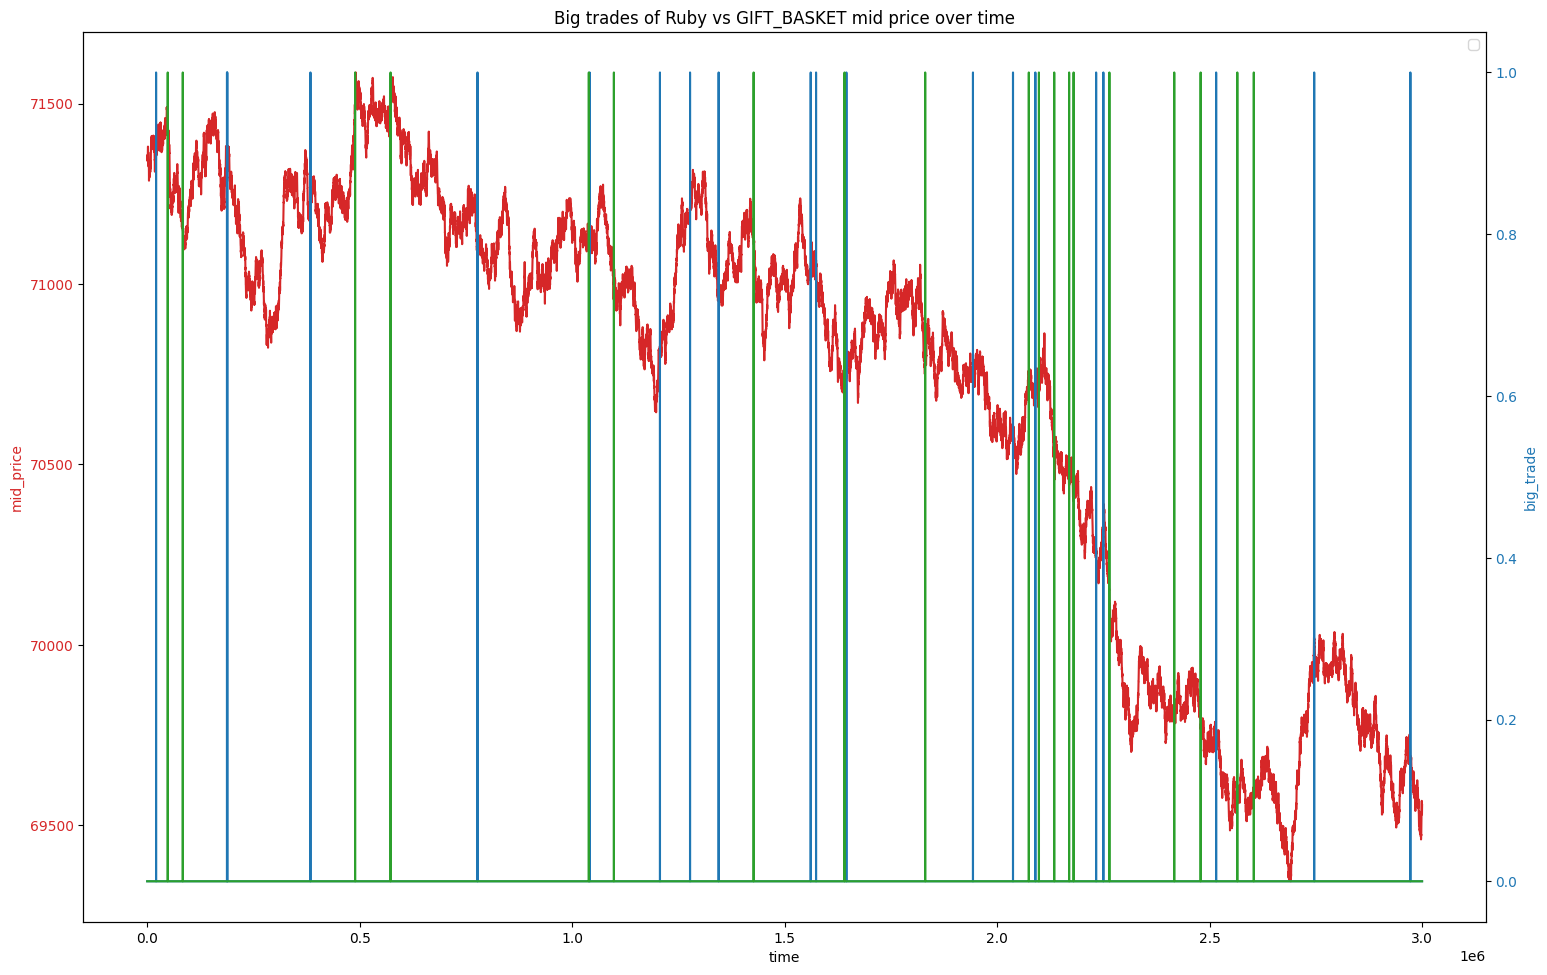

In [38]:
largest_trade = df_trader['quantity'].max()
smallest_trade = df_trader['quantity'].min()
print(f'Largest trade of {PRODUCT} by {TRADER}: {largest_trade}')
print(f'Smallest trade of {PRODUCT} by {TRADER}: {smallest_trade}')
print(f'Value counts of trades of {PRODUCT} by {TRADER}: {df_trader["quantity"].value_counts()}')

df_trader['big_trade'] = (df_trader['quantity'] == largest_trade)
df_trader['big_trade'] = df_trader['big_trade'].astype(int)
df_trader['big_trade'] = df_trader['big_trade'].fillna(0)

df_trader['small_trade'] = (df_trader['quantity'] == smallest_trade)
df_trader['small_trade'] = df_trader['small_trade'].astype(int)
df_trader['small_trade'] = df_trader['small_trade'].fillna(0)


#plot big_trade and price over time wtih right y axis for big_trade
#make figure very wide to see the data better
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price', color=color)
ax1.plot(df_trader['timestamp'], df_trader['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('big_trade', color=color)
ax2.plot(df_trader['timestamp'], df_trader['big_trade'], color=color)
ax2.plot(df_trader['timestamp'], df_trader['small_trade'], color='tab:green')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
#set title
plt.title(f'Big trades of {TRADER} vs {PRODUCT} mid price over time')
plt.legend()
plt.show()

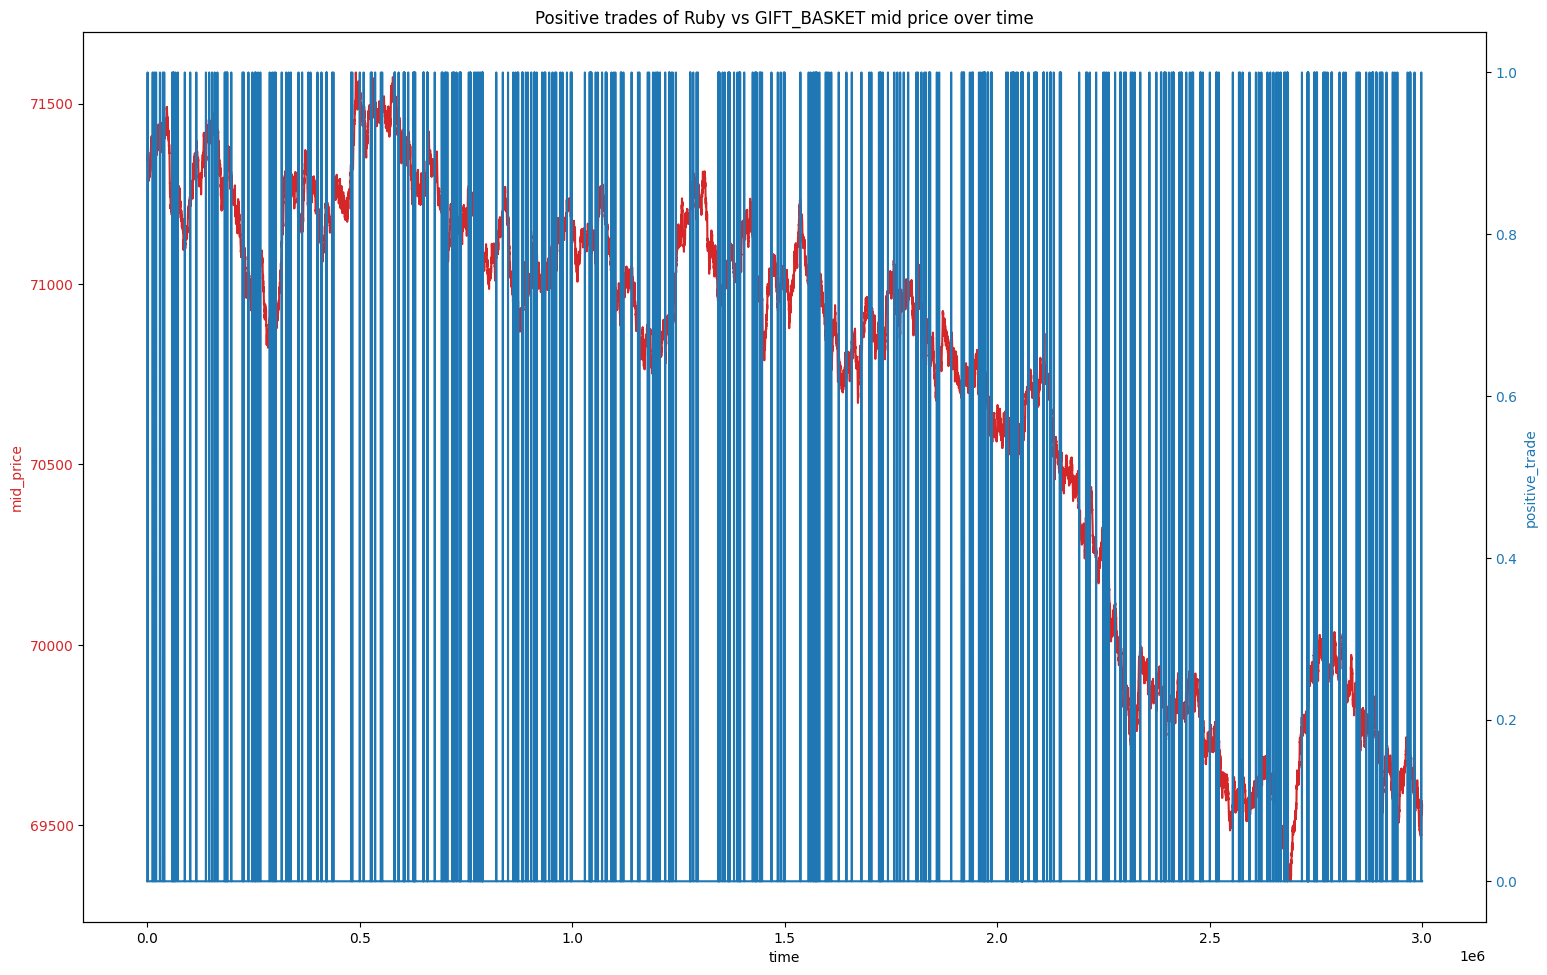

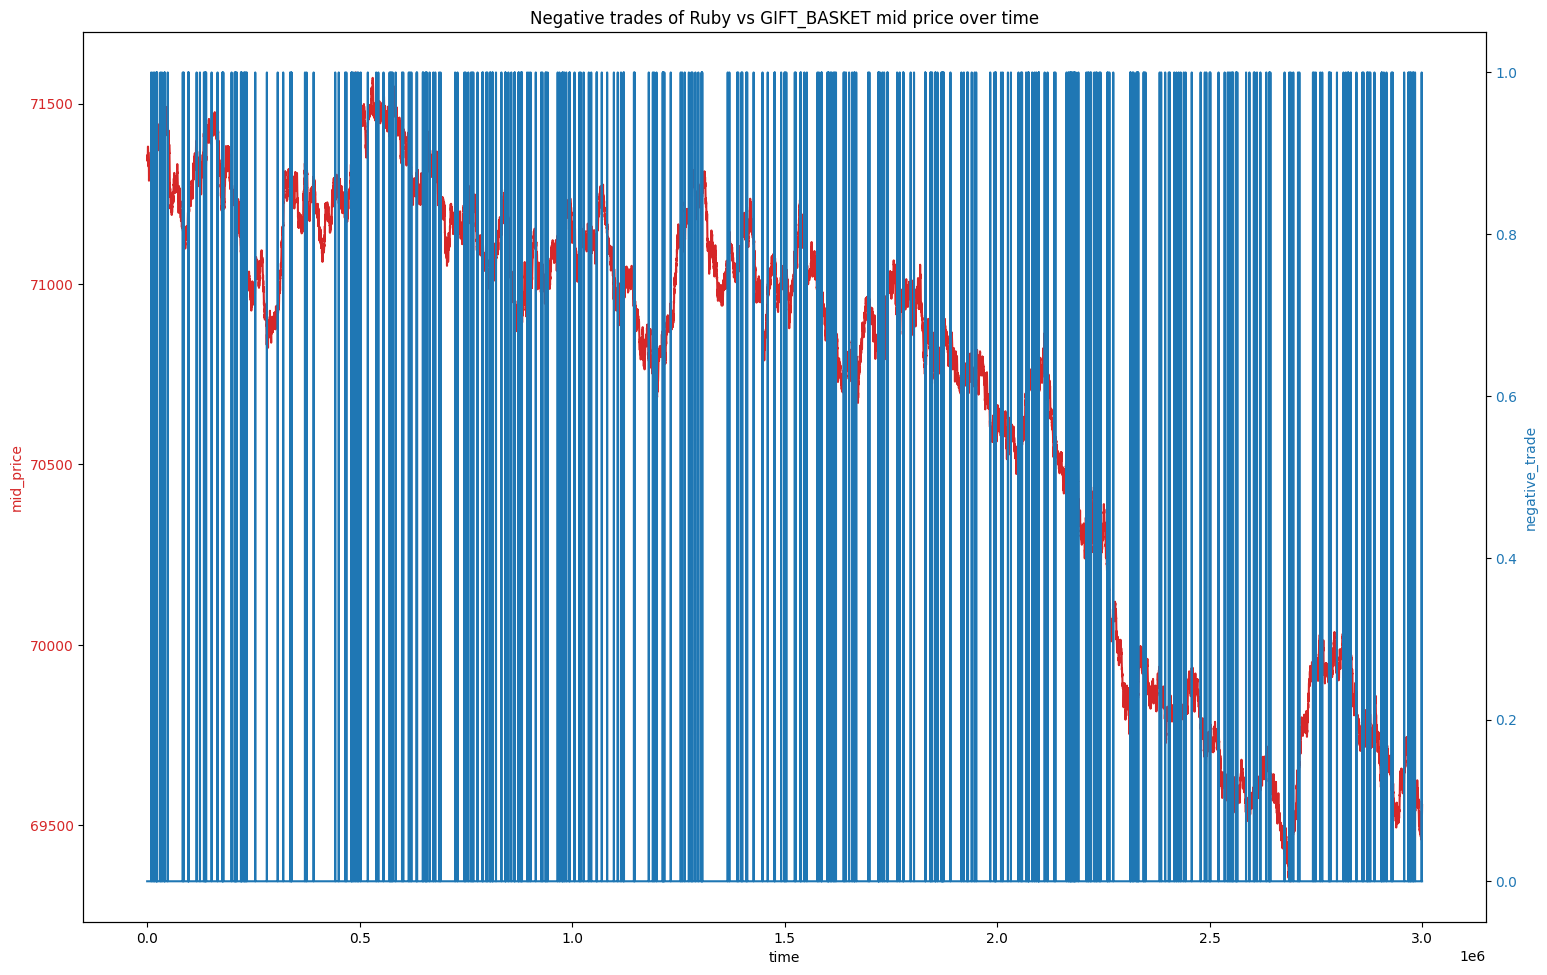

In [39]:
# check what happens after positive trades
df_trader['positive_trade'] = df_trader['quantity'] > 0
df_trader['positive_trade'] = df_trader['positive_trade'].astype(int)
df_trader['positive_trade'] = df_trader['positive_trade'].fillna(0)

#plot positive_trade and price over time wtih right y axis for positive_trade
#make figure very wide to see the data better
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price', color=color)
ax1.plot(df_trader['timestamp'], df_trader['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('positive_trade', color=color)
ax2.plot(df_trader['timestamp'], df_trader['positive_trade'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
#set title
plt.title(f'Positive trades of {TRADER} vs {PRODUCT} mid price over time')
plt.show()

# check what happens after negative trades
df_trader['negative_trade'] = df_trader['quantity'] < 0
df_trader['negative_trade'] = df_trader['negative_trade'].astype(int)
df_trader['negative_trade'] = df_trader['negative_trade'].fillna(0)

#plot negative_trade and price over time wtih right y axis for negative_trade
#make figure very wide to see the data better
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price', color=color)
ax1.plot(df_trader['timestamp'], df_trader['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('negative_trade', color=color)
ax2.plot(df_trader['timestamp'], df_trader['negative_trade'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
#set title
plt.title(f'Negative trades of {TRADER} vs {PRODUCT} mid price over time')
plt.show()

/var/folders/qz/2xz7hqzj4mv4_58tqxfy0z640000gn/T/ipykernel_89533/2655270210.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_trader_2['position'] = df_trader_2['position'].fillna(method='ffill')


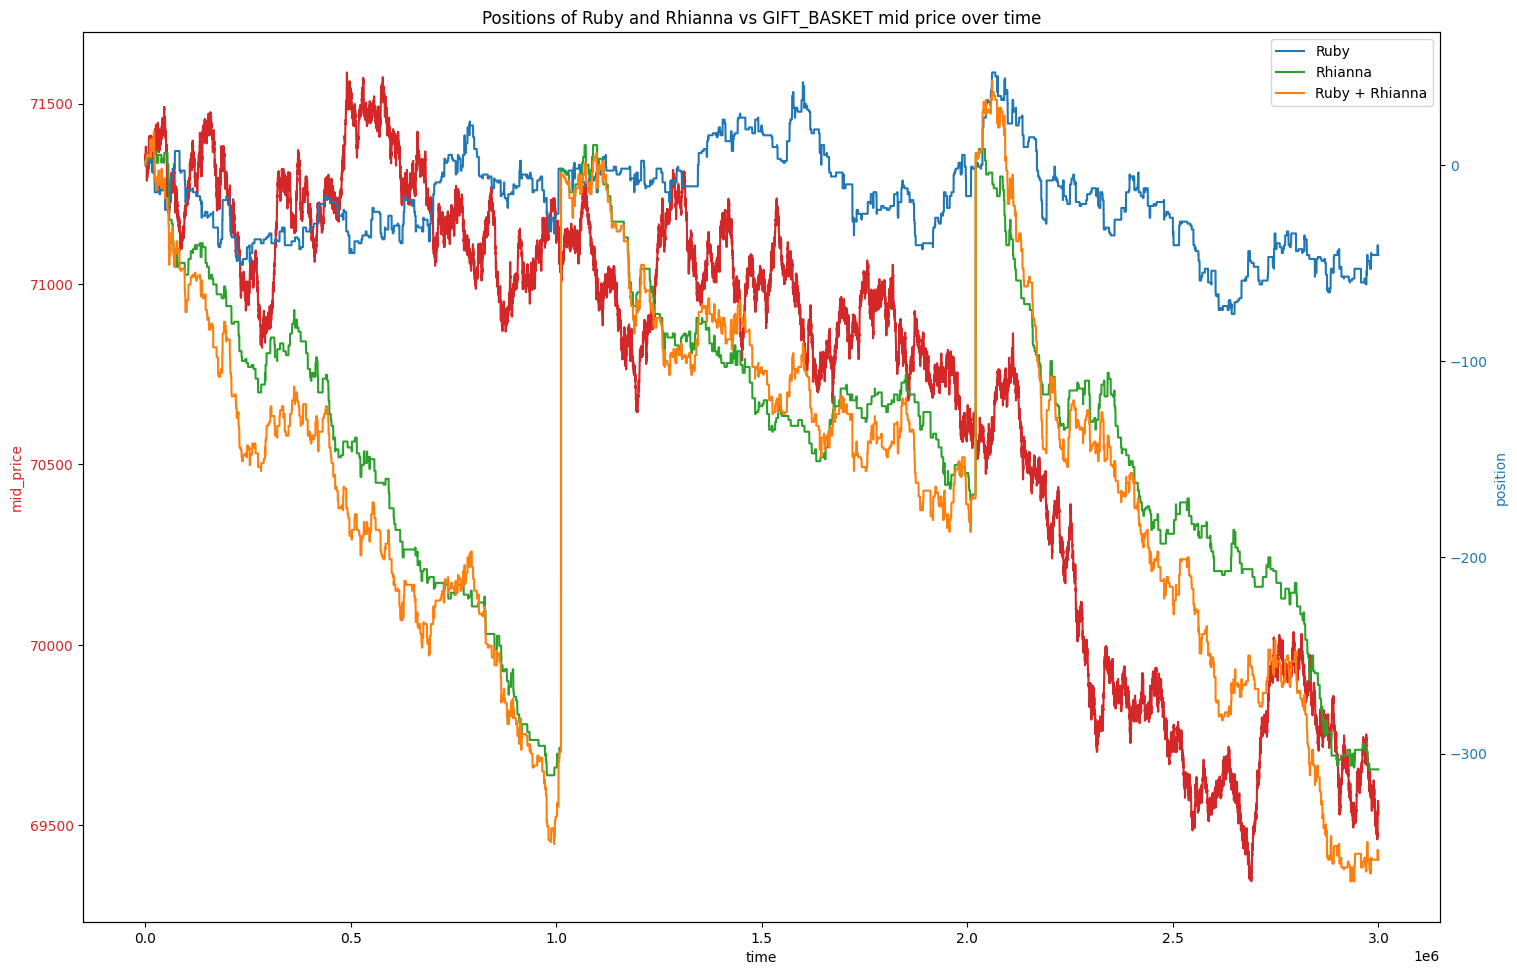

In [43]:
# check linear combination of pairs of traders vs price
TRADER_NAMES = ['Remy', 'Vinnie', 'Vladimir', 'Rhianna', 'Ruby']
TRADER_2 = 'Rhianna'
df_trader_2 = df.query('buyer==@TRADER_2 or seller==@TRADER_2').copy()
df_trader_2['quantity'] = df_trader_2.apply(lambda x: x['quantity'] if x['buyer'] == TRADER_2 else -x['quantity'], axis=1)
df_trader_2_1 = df_trader_2.query('timestamp < 1000000').copy()
df_trader_2_1['position'] = df_trader_2_1['quantity'].cumsum()
df_trader_2_2 = df_trader_2.query('timestamp < 2000000 and timestamp >= 1000000').copy()
df_trader_2_2['position'] = df_trader_2_2['quantity'].cumsum()
df_trader_2_3 = df_trader_2.query('timestamp < 3000000 and timestamp >= 2000000').copy()
df_trader_2_3['position'] = df_trader_2_3['quantity'].cumsum()
df_trader_2 = pd.concat([df_trader_2_1, df_trader_2_2, df_trader_2_3])
df_trader_2 = df_trader_2.merge(prices[['timestamp', 'mid_price']], on='timestamp', how='right')
#fill na values of position with most recent value
df_trader_2['position'] = df_trader_2['position'].fillna(method='ffill')
df_trader_2['position'] = df_trader_2['position'].fillna(0)

df_trader['position_2'] = df_trader_2['position']

#plot positions and price over time wtih right y axis for position
#make figure very wide to see the data better
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('mid_price', color=color)
ax1.plot(df_trader['timestamp'], df_trader['mid_price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('position', color=color)
ax2.plot(df_trader['timestamp'], df_trader['position'], color=color)
ax2.plot(df_trader['timestamp'], df_trader['position_2'], color='tab:green')
ax2.plot(df_trader['timestamp'], df_trader['position'] + df_trader['position_2'], color='tab:orange')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
#set title
plt.title(f'Positions of {TRADER} and {TRADER_2} vs {PRODUCT} mid price over time')
plt.legend([TRADER, TRADER_2, f'{TRADER} + {TRADER_2}'])
plt.show()